In [80]:
%matplotlib inline 
import matplotlib.pyplot as plt 
plt.style.use( 'ggplot' )

import pandas 
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [81]:
df.columns

Index(['total_score', 'fa_rep', 'hbond_sc', 'all_cst', 'tot_pstat_pm',
       'tot_nlpstat_pm', 'tot_burunsat_pm', 'tot_hbond_pm', 'tot_NLconts_pm',
       'tot_nlsurfaceE_pm', 'tot_total_charge', 'tot_total_pos_charges',
       'tot_total_neg_charges', 'tot_seq_recovery', 'SR_1', 'SR_1_total_score',
       'SR_1_fa_rep', 'SR_1_hbond_sc', 'SR_1_all_cst', 'SR_1_hbond_pm',
       'SR_1_burunsat_pm', 'SR_1_pstat_pm', 'SR_1_nlpstat_pm', 'SR_2',
       'SR_2_total_score', 'SR_2_fa_rep', 'SR_2_hbond_sc', 'SR_2_all_cst',
       'SR_2_hbond_pm', 'SR_2_burunsat_pm', 'SR_2_pstat_pm', 'SR_2_nlpstat_pm',
       'SR_3', 'SR_3_total_score', 'SR_3_fa_rep', 'SR_3_hbond_sc',
       'SR_3_all_cst', 'SR_3_hbond_pm', 'SR_3_burunsat_pm', 'SR_3_pstat_pm',
       'SR_3_nlpstat_pm', 'SR_4', 'SR_4_total_score', 'SR_4_fa_rep',
       'SR_4_hbond_sc', 'SR_4_all_cst', 'SR_4_hbond_pm', 'SR_4_burunsat_pm',
       'SR_4_pstat_pm', 'SR_4_nlpstat_pm', 'SR_5', 'SR_5_total_score',
       'SR_5_fa_rep', 'SR_5_hbond_sc', 

In [82]:
df = pandas.read_csv( '../rosetta_runs/shells/feature_set.csv' )
df = df.groupby( 'description' ).apply( lambda x: x.sort_values( by='total_score' ).head( 10 ).mean() )

In [83]:
len( df.index.unique() )

2895

8880
1600


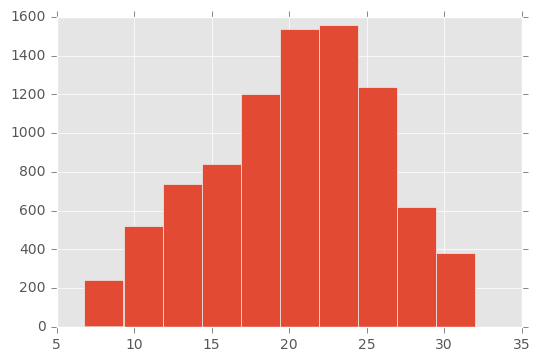

In [104]:
dist = pandas.read_csv( '../data_sets/reference/distance_from_active_site.csv', index_col='name' )
print( len( dist ) ) 
wihtin_15 = dist[ ( dist.distance < 15 ) ] 
print( len( wihtin_15 ) )
dist = dist[ 'distance' ]
dist.hist()

In [85]:
df[ 'dist' ] = dist.loc[ df.index ]
df.dist.max()

30.648891449000001

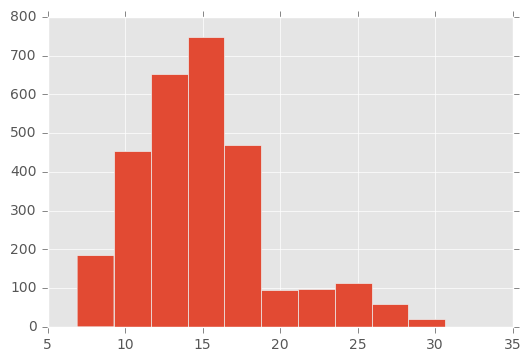

In [86]:
df.dist.hist()

In [105]:
df.boxplot?

/usr/local/bin/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:5: FutureWarning: 
The default value for 'return_type' will change to 'axes' in a future release.
 To use the future behavior now, set return_type='axes'.
 To keep the previous behavior and silence this warning, set return_type='dict'.


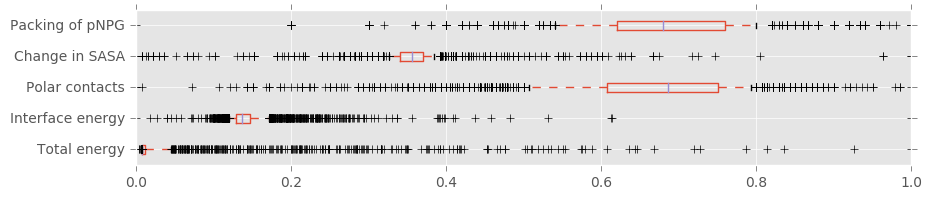

/usr/local/bin/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:13: FutureWarning: 
The default value for 'return_type' will change to 'axes' in a future release.
 To use the future behavior now, set return_type='axes'.
 To keep the previous behavior and silence this warning, set return_type='dict'.


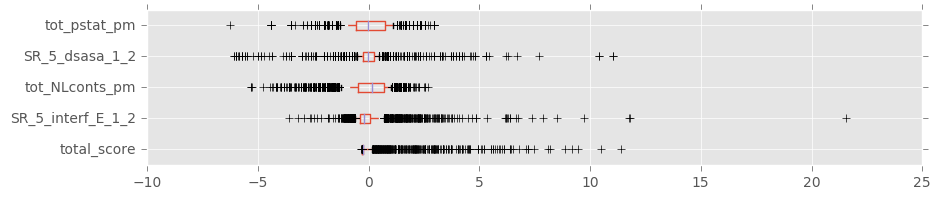

In [111]:
my_cols = [ 'total_score', 'SR_5_interf_E_1_2', 'tot_NLconts_pm', 'SR_5_dsasa_1_2', 'tot_pstat_pm' ] 
scl = MinMaxScaler()
my_scaled_df = pandas.DataFrame( scl.fit_transform( df ), columns=df.columns, index=df.index ) 
plt.figure( figsize=( 10, 2 ) ) 
my_scaled_df.boxplot( column=my_cols, vert=False, notch=False, whis=[10, 90], widths=.3 )
plt.yticks( [ i + 1 for i in range( len( my_cols ) )], [ 'Total energy', 'Interface energy', 'Polar contacts', 'Change in SASA', 'Packing of pNPG' ] )
plt.show()

scl = StandardScaler()
my_scaled_df = pandas.DataFrame( scl.fit_transform( df ), columns=df.columns, index=df.index ) 
plt.figure( figsize=( 10, 2 ) ) 
#kwargs = { '
my_scaled_df.boxplot( column=my_cols, vert=False, notch=False, whis=[10, 90], widths=.3 )
plt.show()

/usr/local/bin/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:4: FutureWarning: 
The default value for 'return_type' will change to 'axes' in a future release.
 To use the future behavior now, set return_type='axes'.
 To keep the previous behavior and silence this warning, set return_type='dict'.


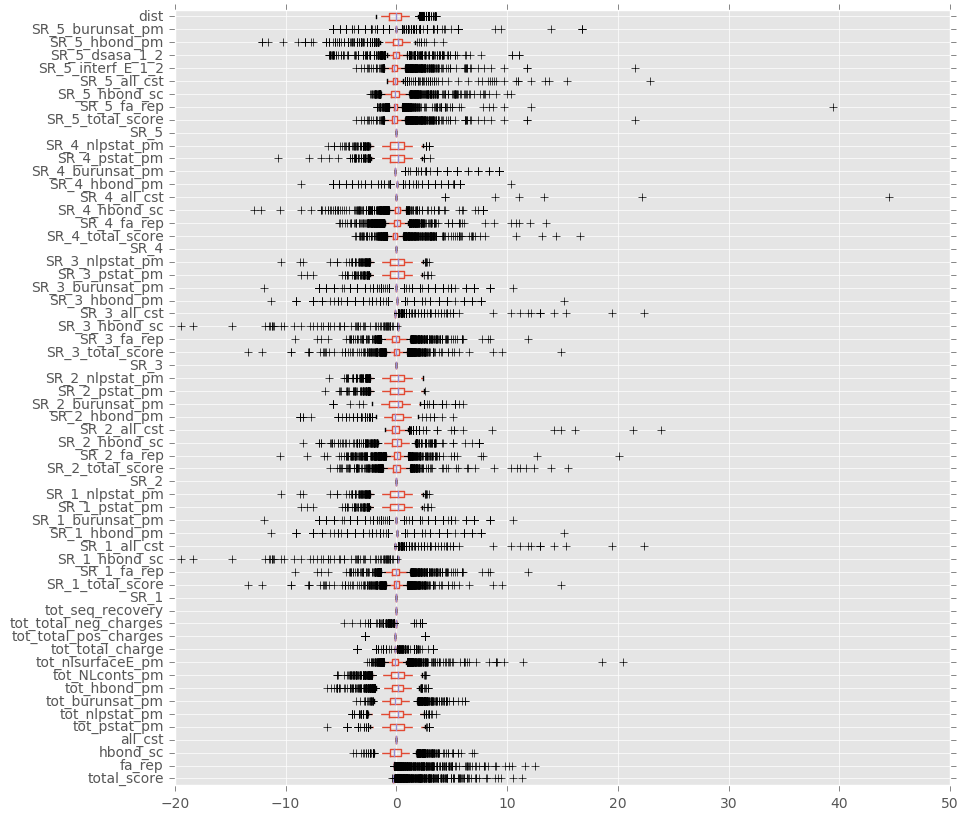

In [92]:
scl = StandardScaler()
my_scaled_df = pandas.DataFrame( scl.fit_transform( df ), columns=df.columns, index=df.index ) 
plt.figure( figsize=( 10, 10 ) ) 
my_scaled_df.boxplot( vert=False )
plt.show()

/usr/local/bin/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:4: FutureWarning: 
The default value for 'return_type' will change to 'axes' in a future release.
 To use the future behavior now, set return_type='axes'.
 To keep the previous behavior and silence this warning, set return_type='dict'.


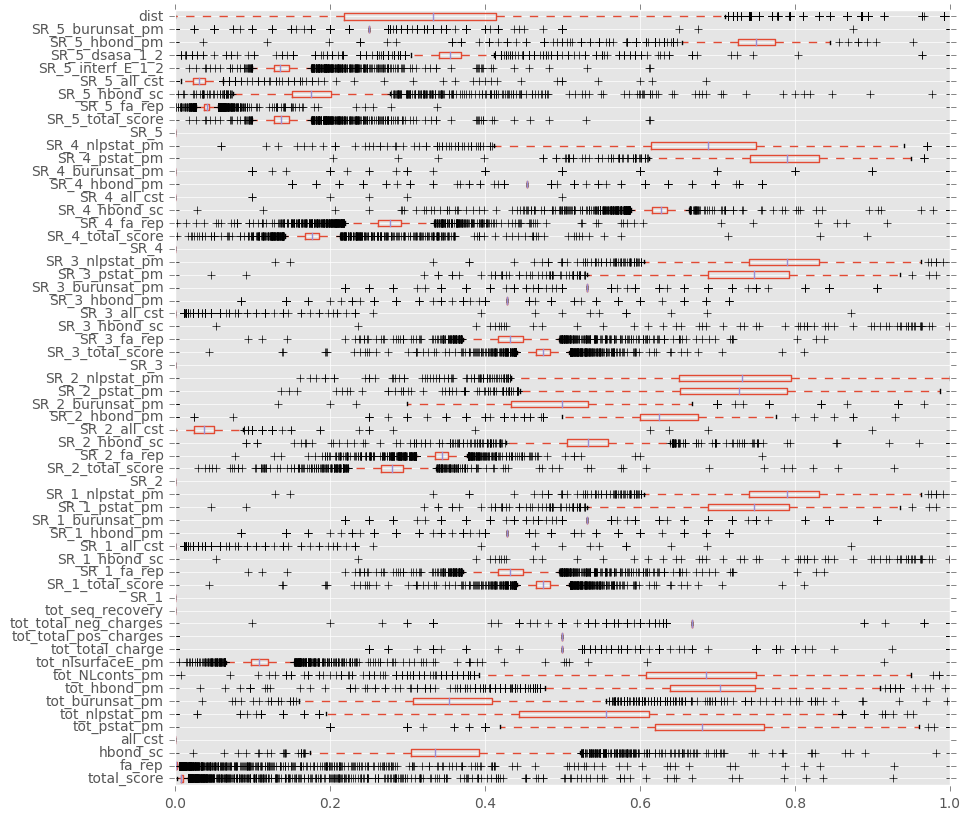

In [94]:
scl = MinMaxScaler()
my_scaled_df = pandas.DataFrame( scl.fit_transform( df ), columns=df.columns, index=df.index ) 
plt.figure( figsize=( 10, 10 ) ) 
my_scaled_df.boxplot( vert=False )
plt.xlim( (0,1) ) 
plt.show()